<a href="https://colab.research.google.com/github/BisolaKadiri/Restaurant-Analysis_Cognifyz-Tech/blob/main/Cognifyz_Tech_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Python Libraries

import numpy as np
import pandas as pd

In [ ]:
#Mount Google Drive to access the file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Define file path and load the data

file_path = '/content/drive/MyDrive/Cognifz_Dataset.csv'

data = pd.read_csv(file_path)

In [ ]:
#Check the first 5 rows of the dataset

data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Customer Preference Analysis**

In [ ]:
#Relationship between the type of cuisine and the restaurant's rating

#Calculate average rating per cuisine
avg_rating_per_cuisine = data.groupby("Cuisines")["Aggregate rating"].mean().round(0)

#Display highest-rated cuisines
highest_rated_cuisines = avg_rating_per_cuisine.sort_values(ascending=False)
print("Average Rating by Cuisine:\n", highest_rated_cuisines)

Average Rating by Cuisine:
 Cuisines
Asian, Indonesian, Western                    5.0
Desserts, Bar Food                            5.0
BBQ, Caribbean, Seafood                       5.0
International, Italian, Southern              5.0
Scottish, Cafe                                5.0
                                             ... 
South Indian, Pizza, Chinese                  0.0
Bakery, Desserts, Healthy Food                0.0
North Indian, Lucknowi                        0.0
Bakery, Desserts, Fast Food, Mithai           0.0
Mithai, South Indian, Chinese, Street Food    0.0
Name: Aggregate rating, Length: 1825, dtype: float64


In [ ]:
#Identify the most popular cuisines among customers based on the number of votes

# Calculate total votes for each cuisine
popular_cuisines = data.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

print("Most Popular Cuisines Based on Votes:\n", popular_cuisines.head(10))

Most Popular Cuisines Based on Votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [ ]:
#Cuisines that tend to receive higher ratings

#Filtering cuisines with an average rating above 4.0
top_rated_cuisines = avg_rating_per_cuisine[avg_rating_per_cuisine > 4.0]

print("Cuisines That Tend to Receive Higher Ratings:\n", top_rated_cuisines)


Cuisines That Tend to Receive Higher Ratings:
 Cuisines
African                                   5.0
American, Asian, Burger                   5.0
American, Asian, European, Seafood        5.0
American, BBQ, Sandwich                   5.0
American, Burger, Cafe                    5.0
                                         ... 
Seafood, Continental, European, German    5.0
Seafood, French                           5.0
Sunda, Indonesian                         5.0
Taiwanese, Street Food                    5.0
World Cuisine                             5.0
Name: Aggregate rating, Length: 87, dtype: float64


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

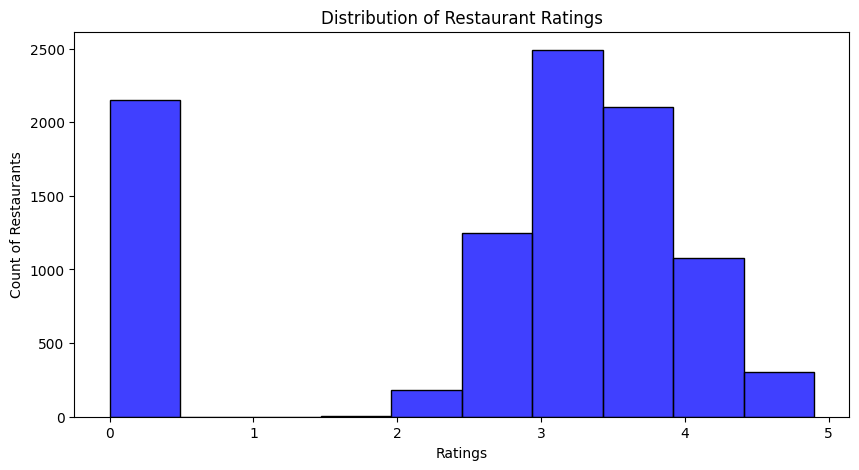

In [ ]:
#The distribution of ratings

plt.figure(figsize=(10, 5))
sns.histplot(data["Aggregate rating"], bins=10, color="blue")
plt.xlabel("Ratings")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

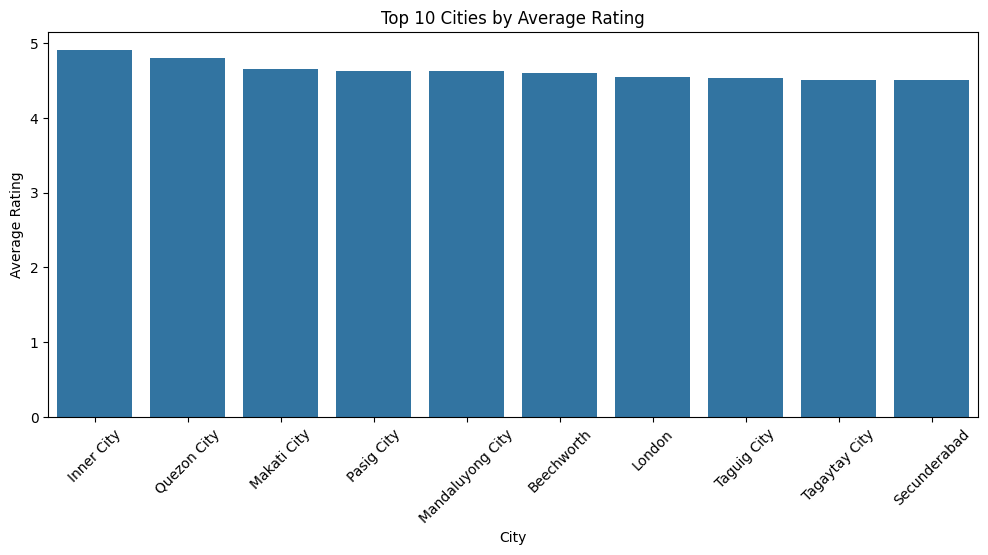

In [ ]:
#Compare the average ratings of different cities

#Calculate average rating per city
avg_rating_per_city = data.groupby("City")["Aggregate rating"].mean().round(2)

#Top 10 cities with highest ratings
top_cities = avg_rating_per_city.sort_values(ascending=False).head(10)

# Bar plot for average ratings by city
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 10 Cities by Average Rating")
plt.show()

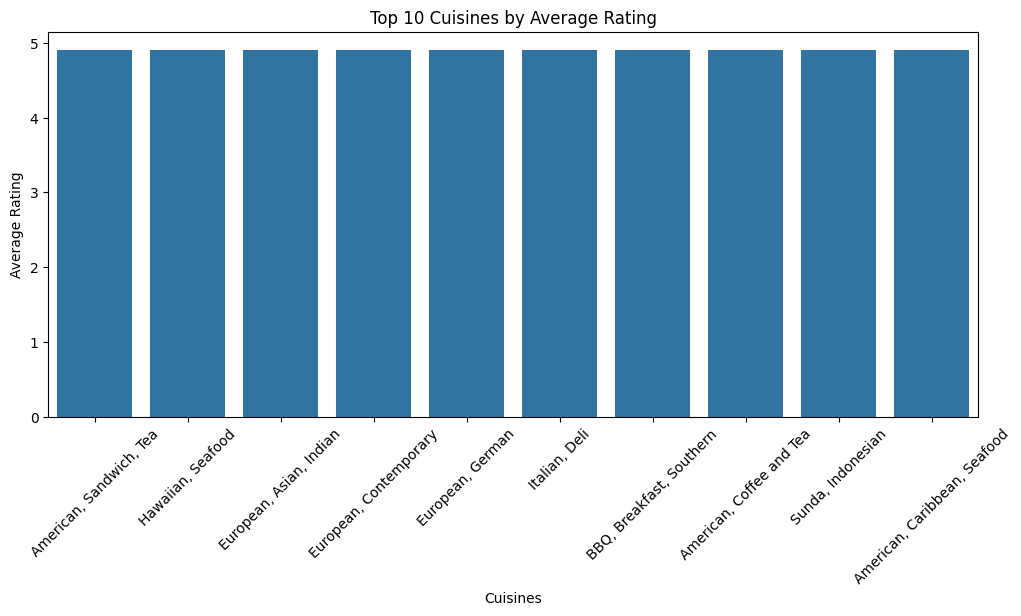

In [ ]:
#Compare the average ratings of different cuisines

#Average rating per cuisine
avg_rating_per_cuisine = data.groupby("Cuisines")["Aggregate rating"].mean().round(2)

#Top 10 highest-rated cuisines
top_cuisines = avg_rating_per_cuisine.sort_values(ascending=False).head(10)

#Bar plot for average ratings of top cuisines
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

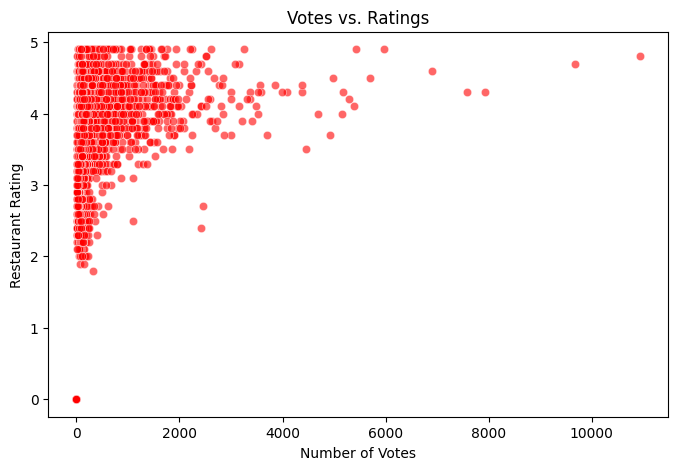

In [ ]:
#The relationship between various features and the target variable

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Votes"], y=data["Aggregate rating"], alpha=0.6, color="red")
plt.xlabel("Number of Votes")
plt.ylabel("Restaurant Rating")
plt.title("Votes vs. Ratings")
plt.show()